### Notebook to display distribution of data across Training and Test data

How to reproduce?
1. Create the training and test data using create_train_test_data.py file in the paleorec git repo
2. Copy and paste the lipdverse_downsampled_timestamp.csv and lipdverse_test_timestamp.csv file in this directory.
3. Change the name of the file in the 2nd cell to reflect the new file name.
4. Run all the cells to see the distribution of the training v/s the test data

There are 2 distribution objects

1. For each archiveType, how are the proxy observation types distributed?
2. For each proxy observation type, how are the interpretation variable distributed?

In [1]:
import pandas as pd
import numpy as np
import os
from collections import defaultdict
import collections
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('D:\\annotating_paleoclimate_data\\paleorec\\data\\csv\\lipdverse_downsampled_20210612_192536.csv')
test_df = pd.read_csv('D:\\annotating_paleoclimate_data\\paleorec\\data\\csv\\lipdverse_test_20210612_192536.csv')

train_df = train_df.replace(np.nan, 'NA', regex=True)
test_df = test_df.replace(np.nan, 'NA', regex=True)

In [3]:
def calc_freq(dataframe_obj, col1, col2):

    counter_dict = {}
    for index, row in dataframe_obj.iterrows():
        if row[col1] not in counter_dict:
            counter_dict[row[col1]] = {}
            counter_dict[row[col1]][row[col2]] = 1
        else:
            if row[col2] not in counter_dict[row[col1]]:
                counter_dict[row[col1]][row[col2]] = 1
            else:
                counter_dict[row[col1]][row[col2]] += 1
    return counter_dict

In [4]:
arch_proxy_train = calc_freq(train_df, 'archiveType', 'proxyObservationType')
arch_proxy_test = calc_freq(test_df, 'archiveType', 'proxyObservationType')

In [5]:
def normalize_freq(dict_obj):
    for key, in_dict in dict_obj.items():
        sum_ = sum(list(in_dict.values()))
        for k, v in in_dict.items():
            in_dict[k] = v/sum_

normalize_freq(arch_proxy_train)
normalize_freq(arch_proxy_test)

In [9]:
def draw_barplots(train_dict, test_dict, xlabel_text):
    for key in test_dict.keys():
        if key in train_dict:
            labels = train_dict[key].keys()
            train_val, test_val = [], []
            for label in labels:
                train_val.append(train_dict[key][label])
                test_val.append(test_dict[key][label] if label in test_dict[key] else 0)

            print('PLOT FOR : {}'.format(key))
            x = np.arange(len(labels))  # the label locations
            width = 0.35  # the width of the bars

            fig, ax = plt.subplots(figsize=(12,8))

            rects1 = ax.bar(x - width/2, train_val, width, label='Train')
            rects2 = ax.bar(x + width/2, test_val, width, label='Test')

            # Add some text for labels, title and custom x-axis tick labels, etc.
            ax.set_ylabel('Frequency')
            ax.set_xlabel(xlabel_text)
            ax.set_xticks(x)
            ax.set_xticklabels(labels,rotation='vertical', ha='center')
            ax.legend()

        def autolabel(rects):
            """
            Attach a text label above each bar displaying its height
            """
            for rect in rects:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                        '%f' % (height),
                        ha='center', va='bottom', rotation='vertical')

        autolabel(rects1)
        autolabel(rects2)

        fig.tight_layout()

        plt.show()
        print('**********************************************************************************************************')

PLOT FOR : MARINESEDIMENT


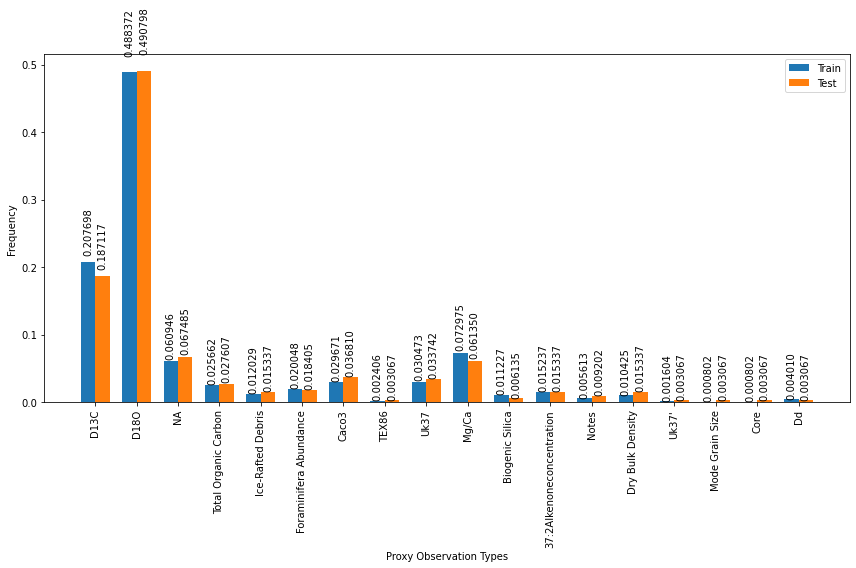

**********************************************************************************************************
PLOT FOR : WOOD


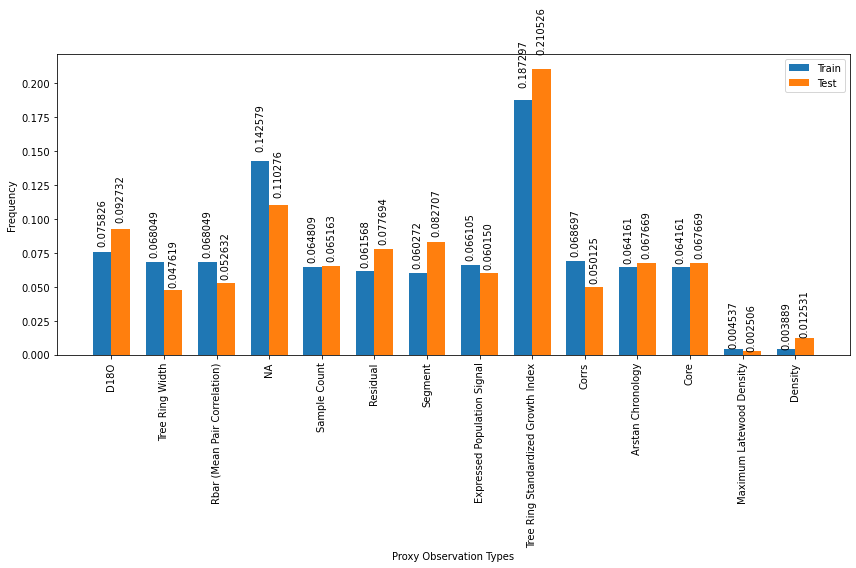

**********************************************************************************************************
PLOT FOR : LAKESEDIMENT


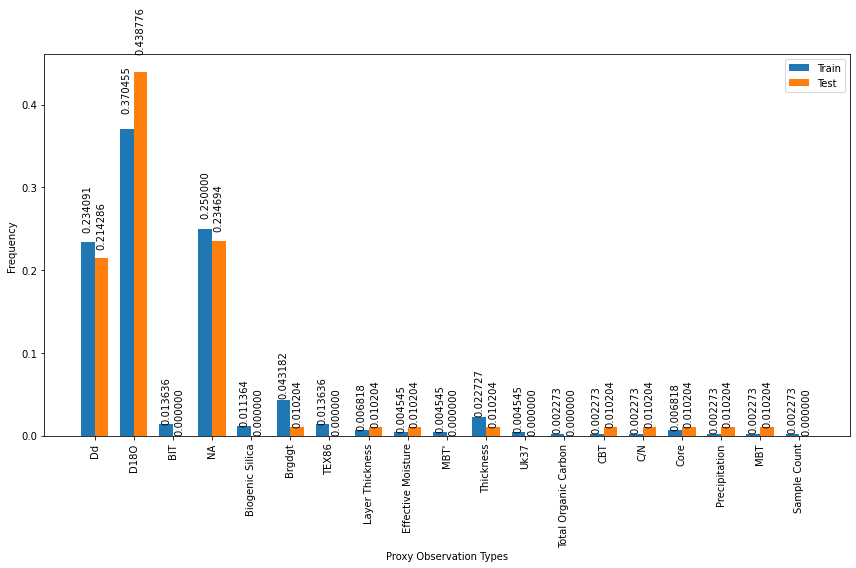

**********************************************************************************************************
PLOT FOR : GLACIERICE


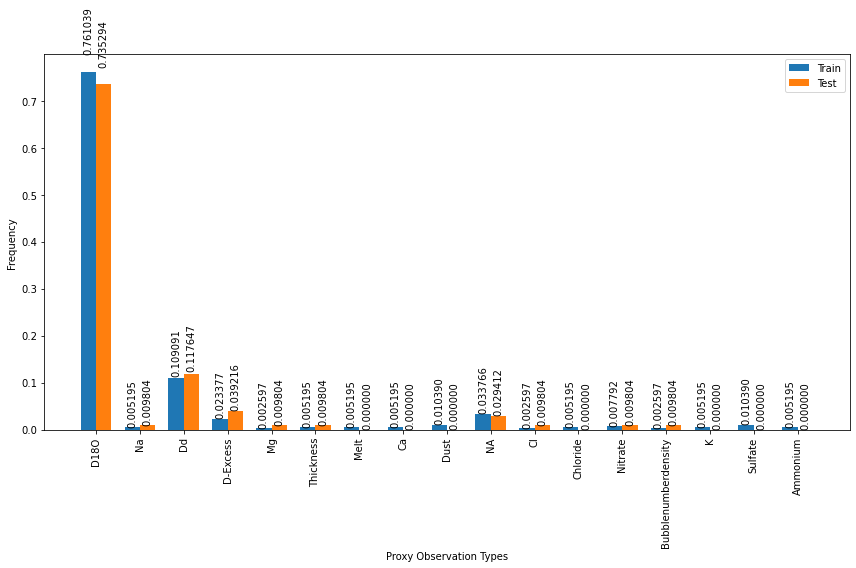

**********************************************************************************************************
PLOT FOR : MOLLUSKSHELL


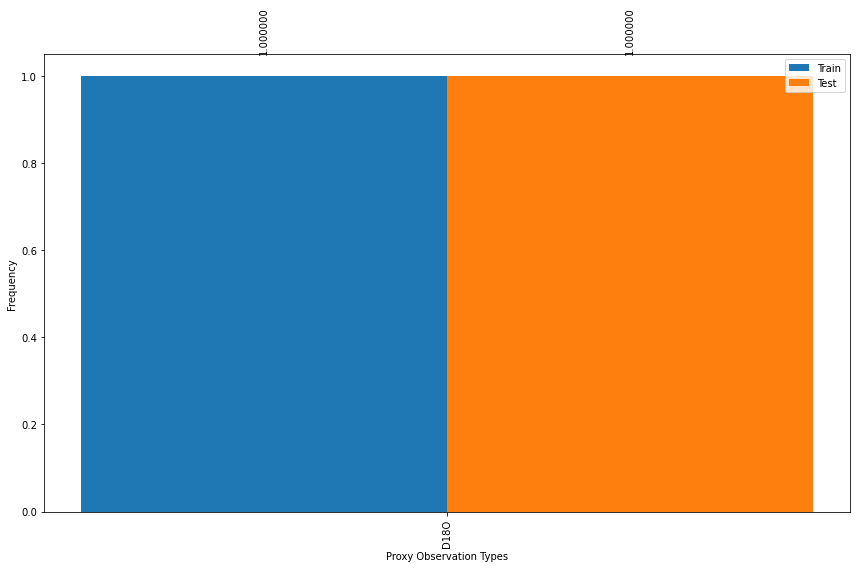

**********************************************************************************************************
PLOT FOR : MIDDEN


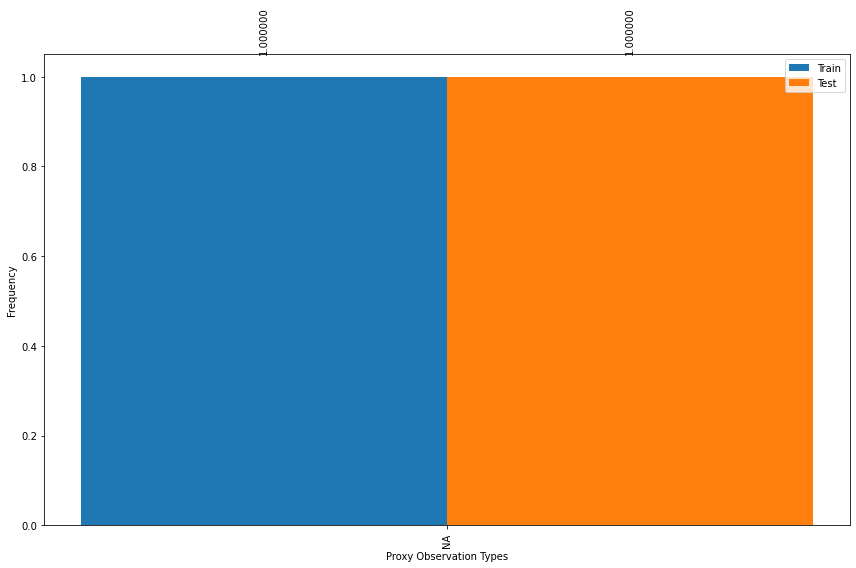

**********************************************************************************************************
PLOT FOR : CORAL


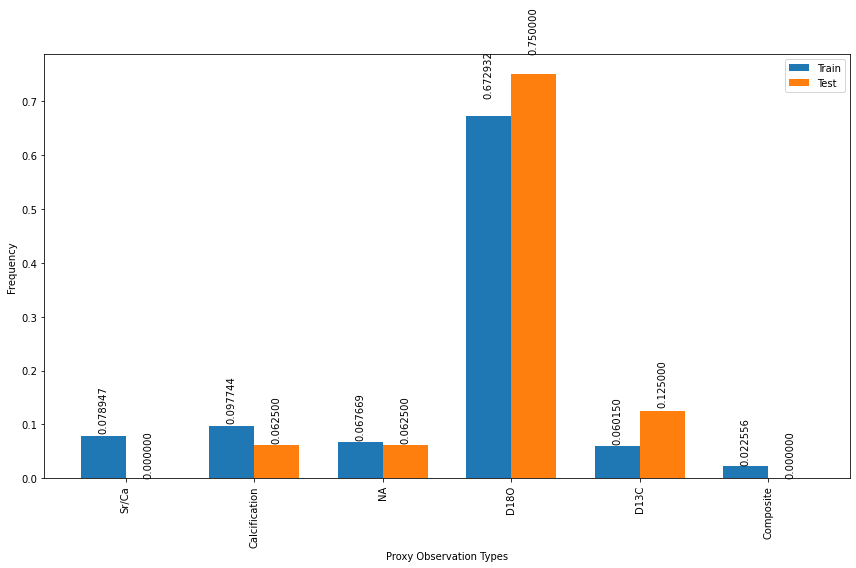

**********************************************************************************************************
PLOT FOR : SPELEOTHEM


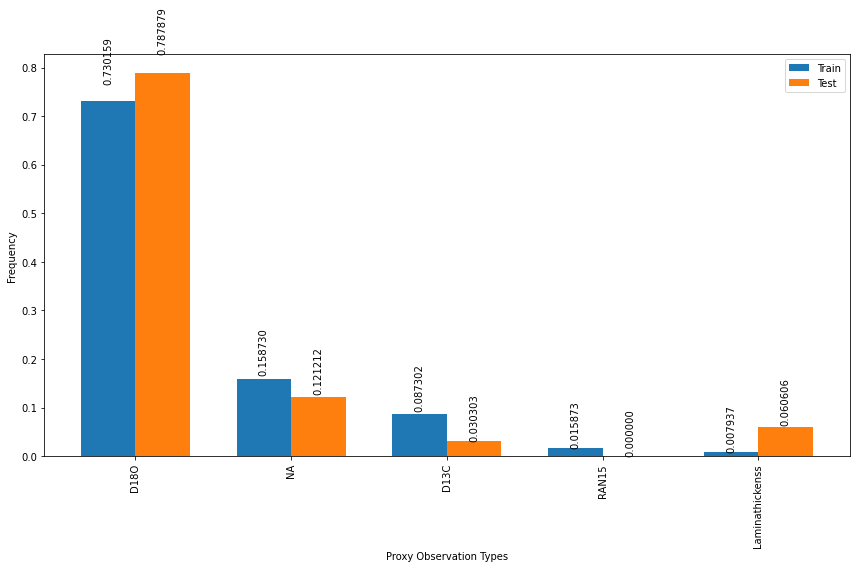

**********************************************************************************************************
PLOT FOR : GROUNDICE


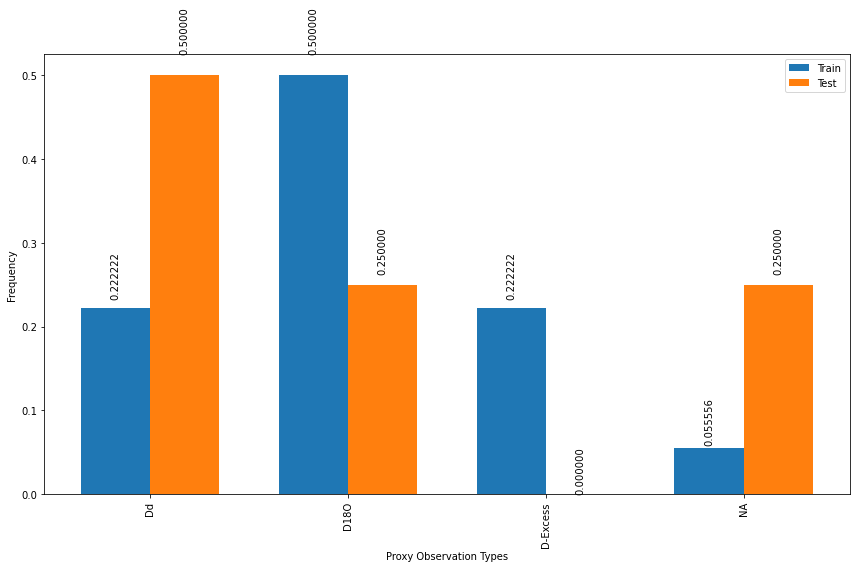

**********************************************************************************************************
PLOT FOR : TERRESTRIALSEDIMENT


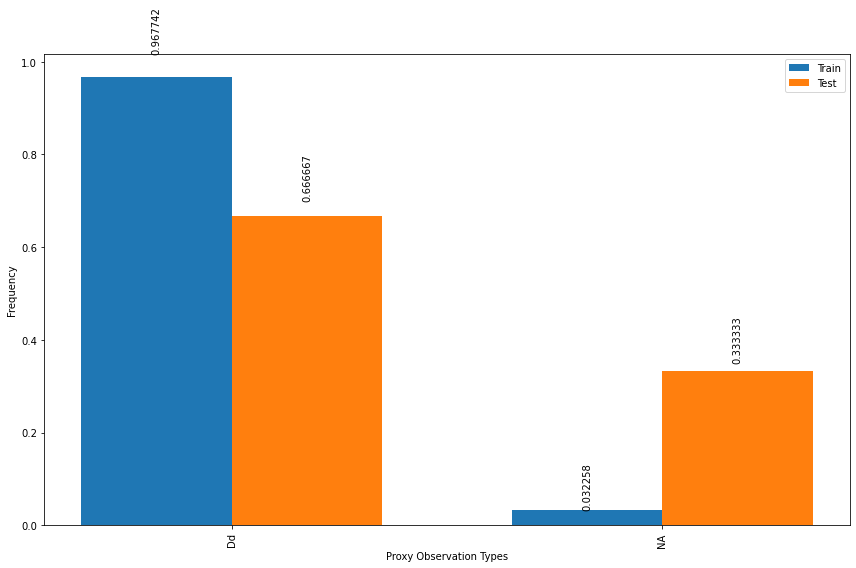

**********************************************************************************************************
PLOT FOR : DOCUMENTS


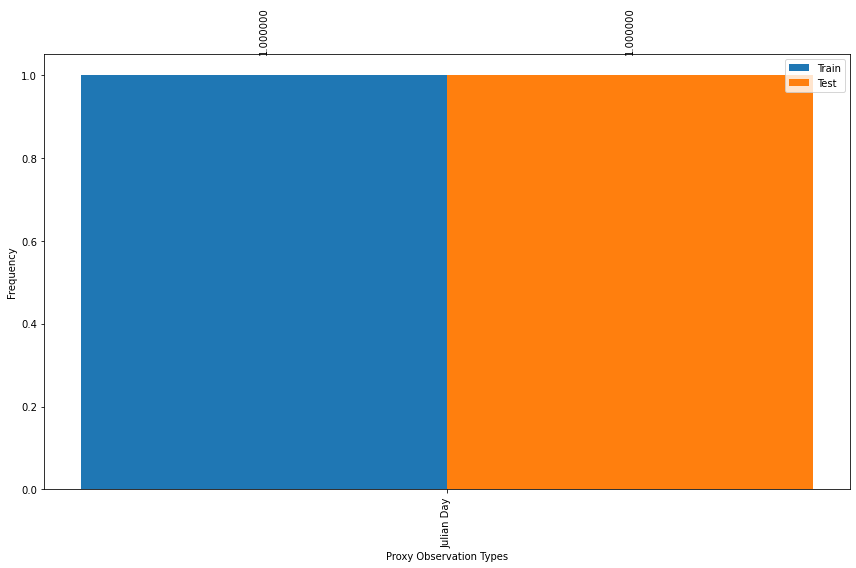

**********************************************************************************************************
PLOT FOR : ICE-OTHER


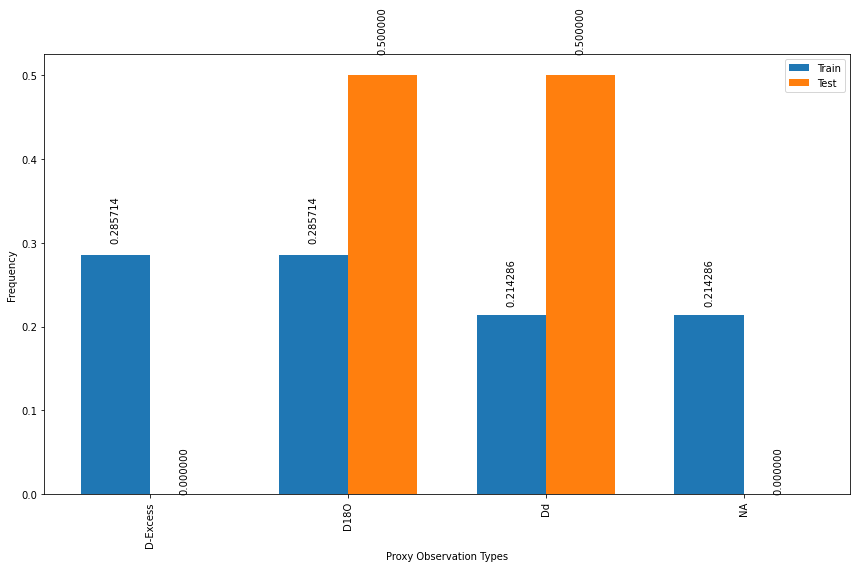

**********************************************************************************************************
PLOT FOR : SCLEROSPONGE


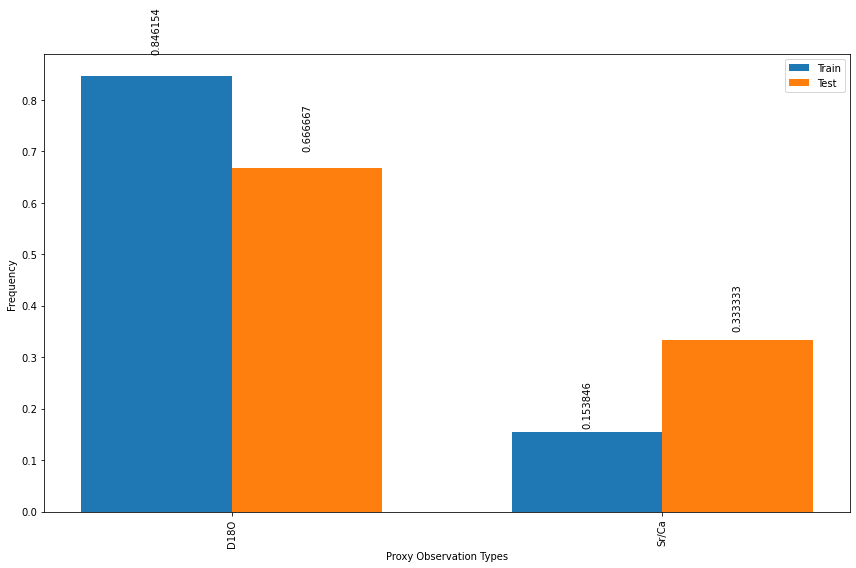

**********************************************************************************************************
PLOT FOR : PEAT


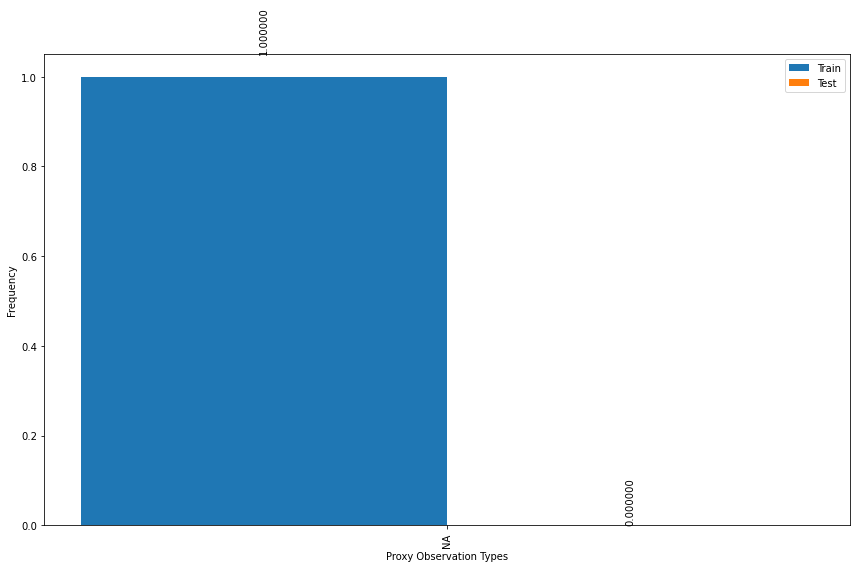

**********************************************************************************************************


In [7]:
draw_barplots(arch_proxy_train, arch_proxy_test, 'Proxy Observation Types')

PLOT FOR : D18O


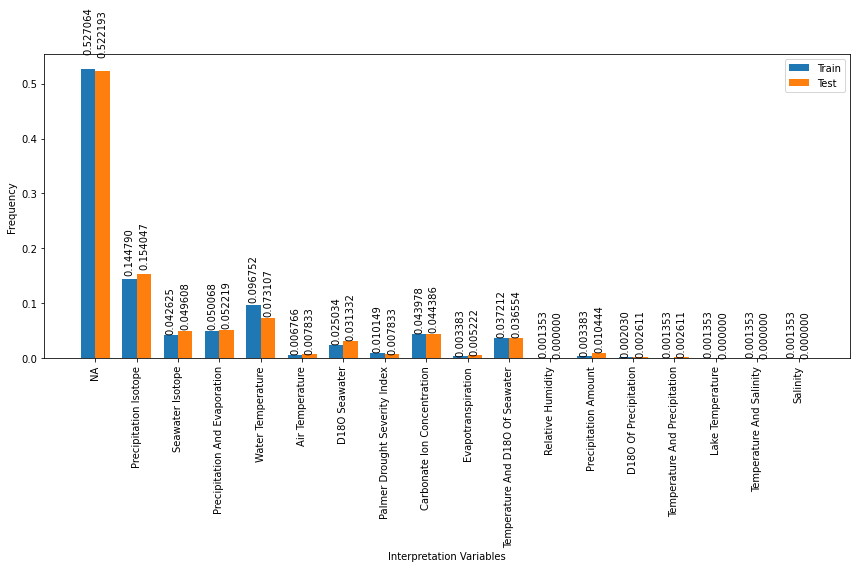

**********************************************************************************************************
PLOT FOR : SAMPLE COUNT


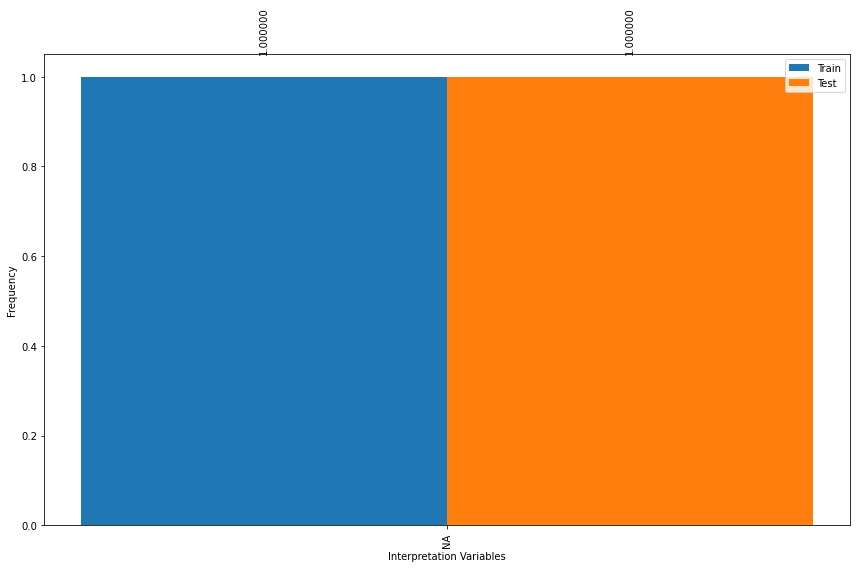

**********************************************************************************************************
PLOT FOR : RESIDUAL


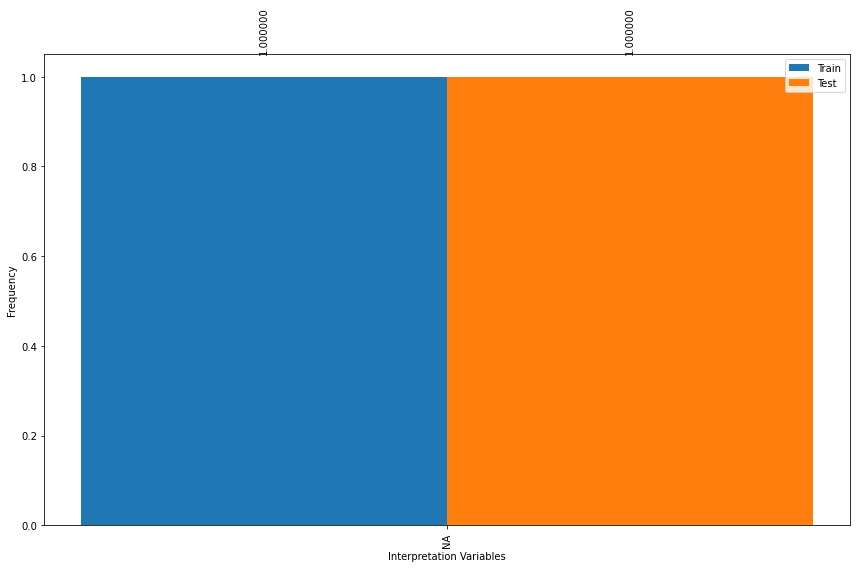

**********************************************************************************************************
PLOT FOR : ARSTAN CHRONOLOGY


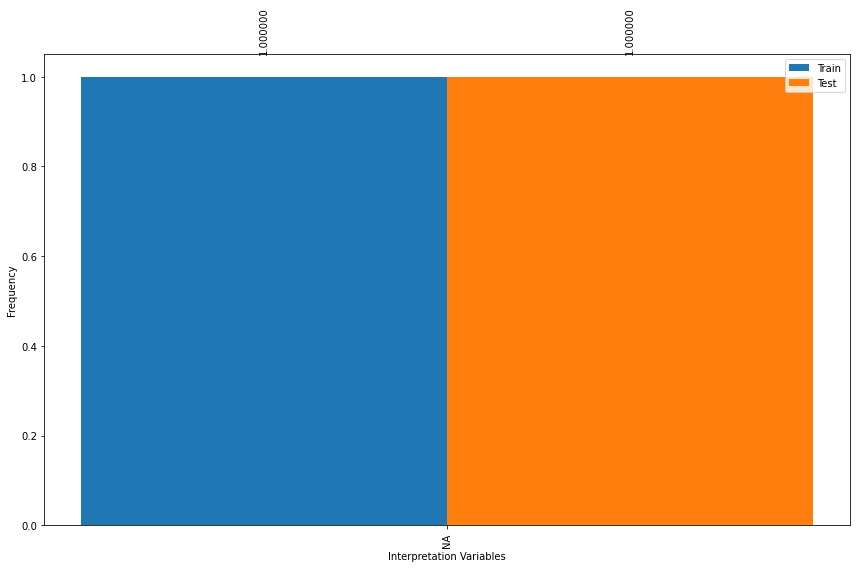

**********************************************************************************************************
PLOT FOR : NA


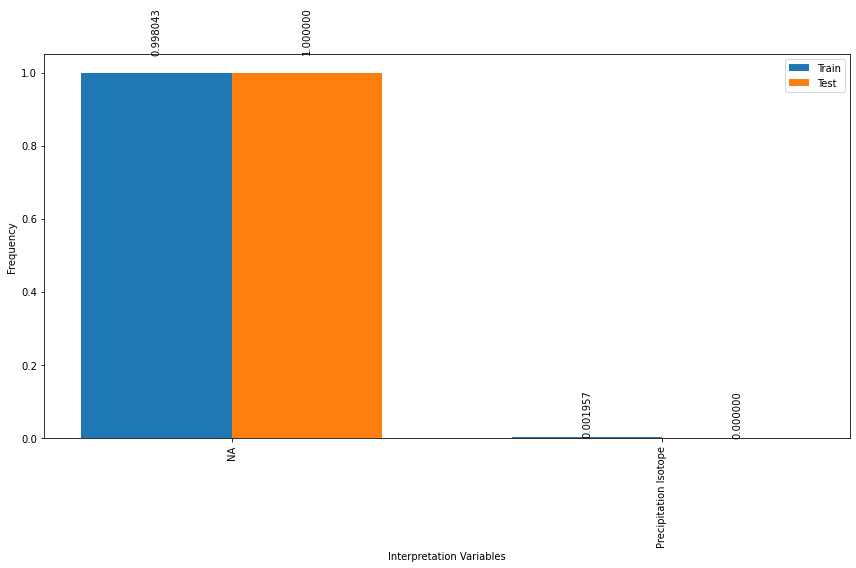

**********************************************************************************************************
PLOT FOR : CORRS


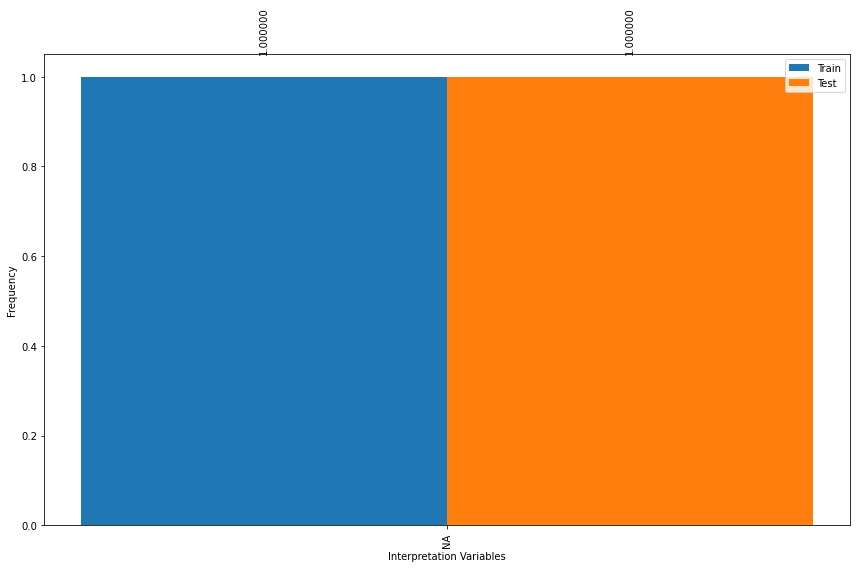

**********************************************************************************************************
PLOT FOR : TREE RING STANDARDIZED GROWTH INDEX


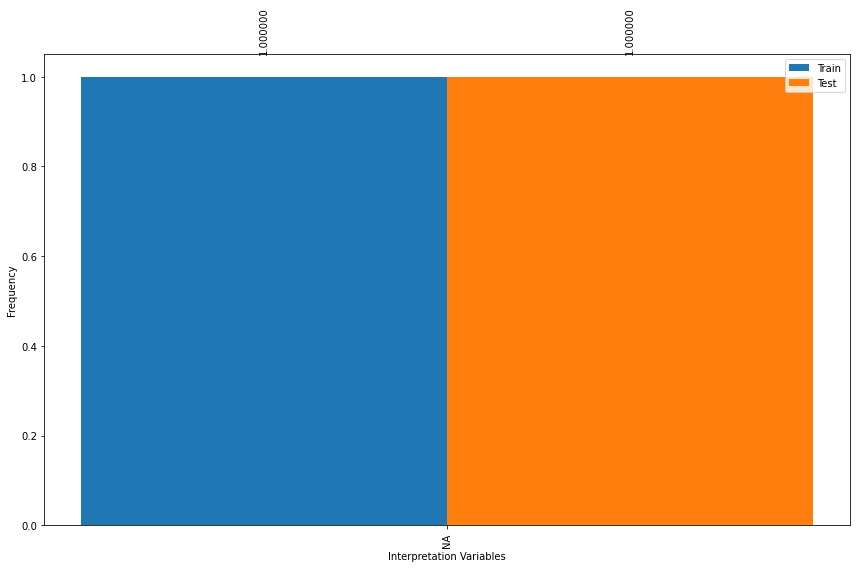

**********************************************************************************************************
PLOT FOR : MG/CA


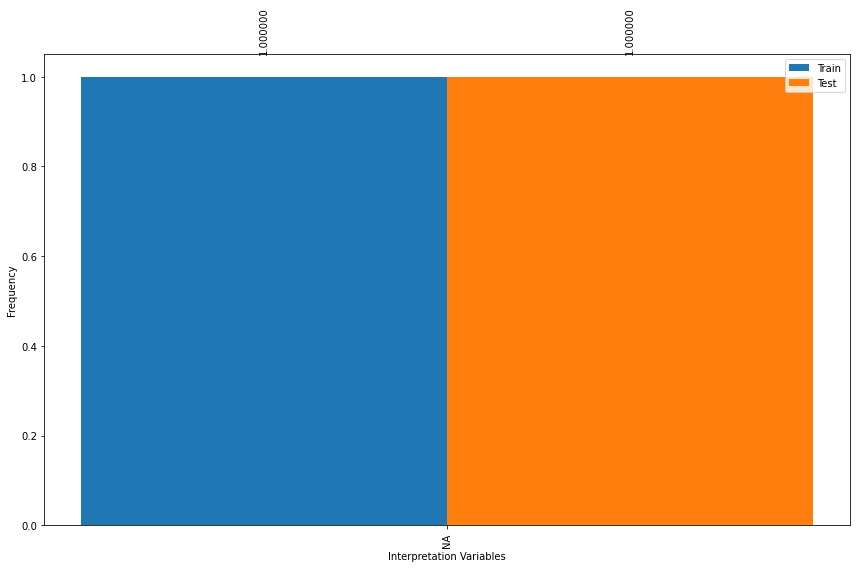

**********************************************************************************************************
PLOT FOR : TREE RING WIDTH


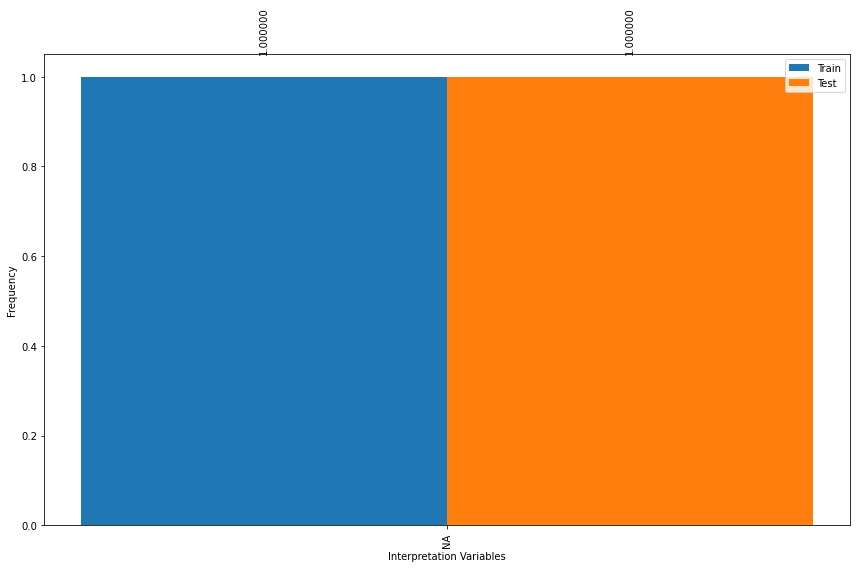

**********************************************************************************************************
PLOT FOR : RBAR (MEAN PAIR CORRELATION)


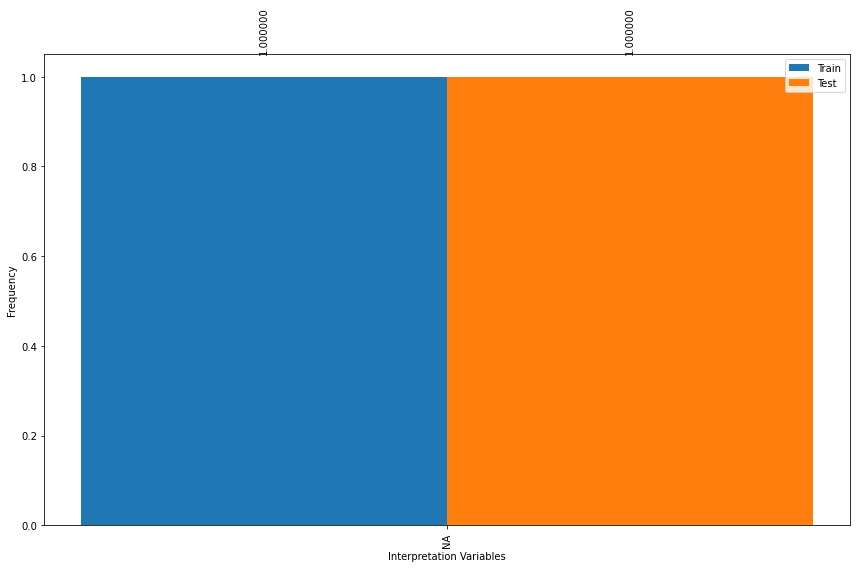

**********************************************************************************************************
PLOT FOR : CORE


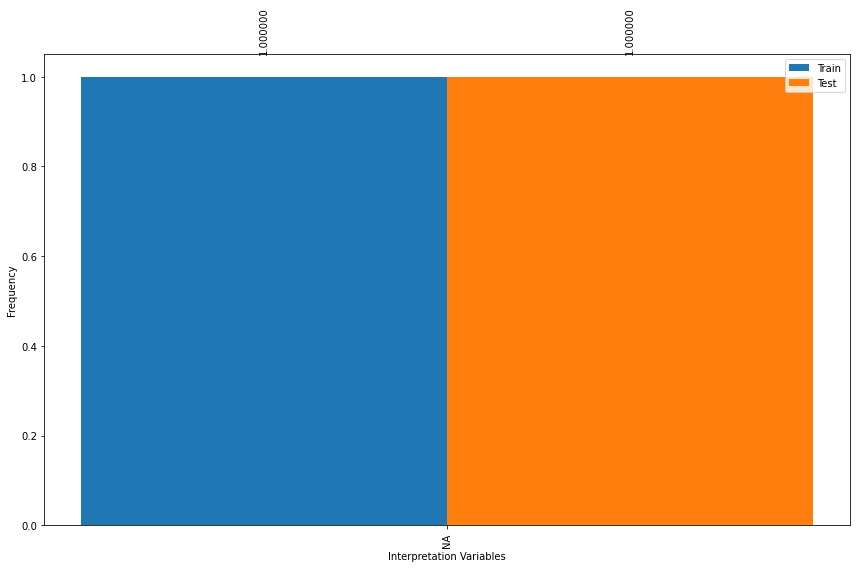

**********************************************************************************************************
PLOT FOR : BIOGENIC SILICA


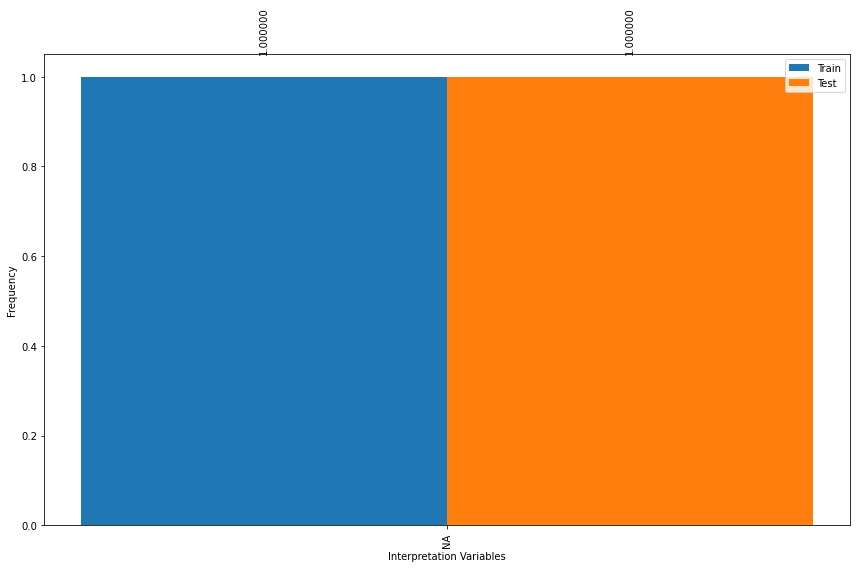

**********************************************************************************************************
**********************************************************************************************************
PLOT FOR : THICKNESS


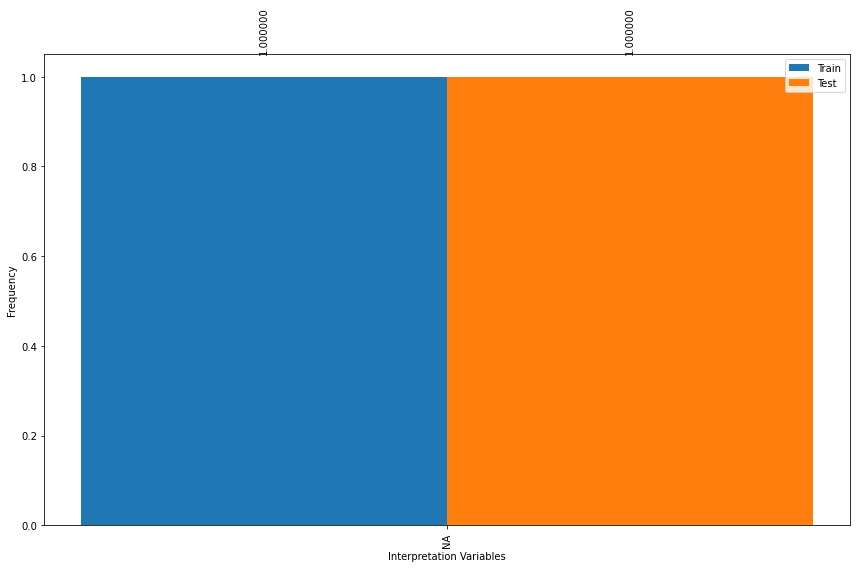

**********************************************************************************************************
PLOT FOR : DD


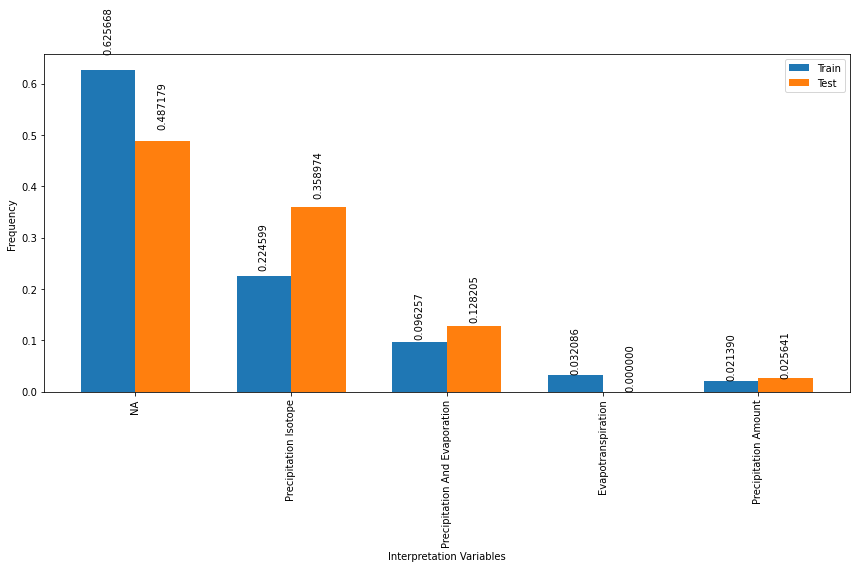

**********************************************************************************************************
PLOT FOR : CACO3


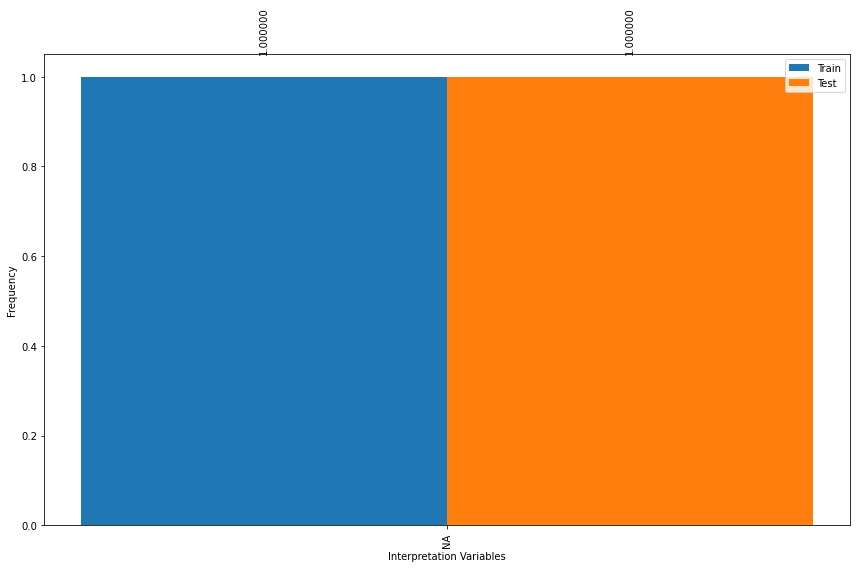

**********************************************************************************************************
PLOT FOR : UK37


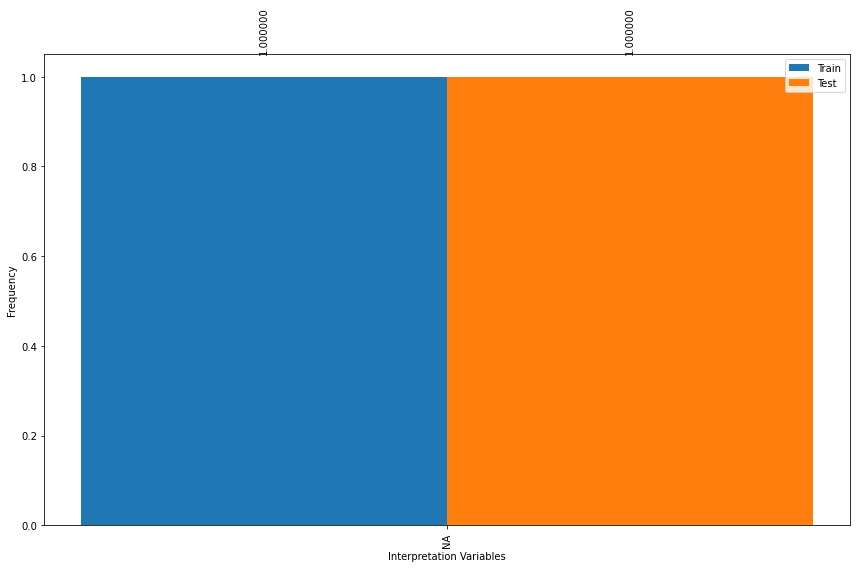

**********************************************************************************************************
PLOT FOR : D13C


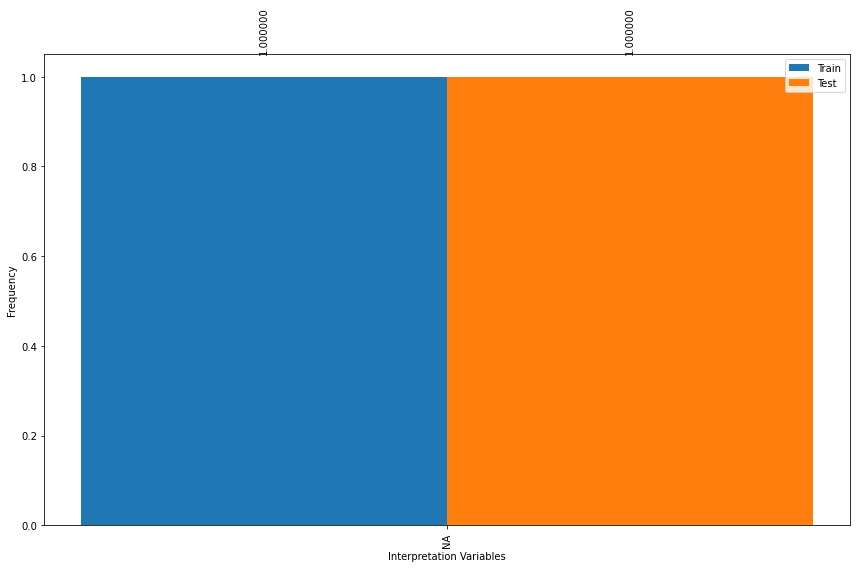

**********************************************************************************************************
PLOT FOR : D-EXCESS


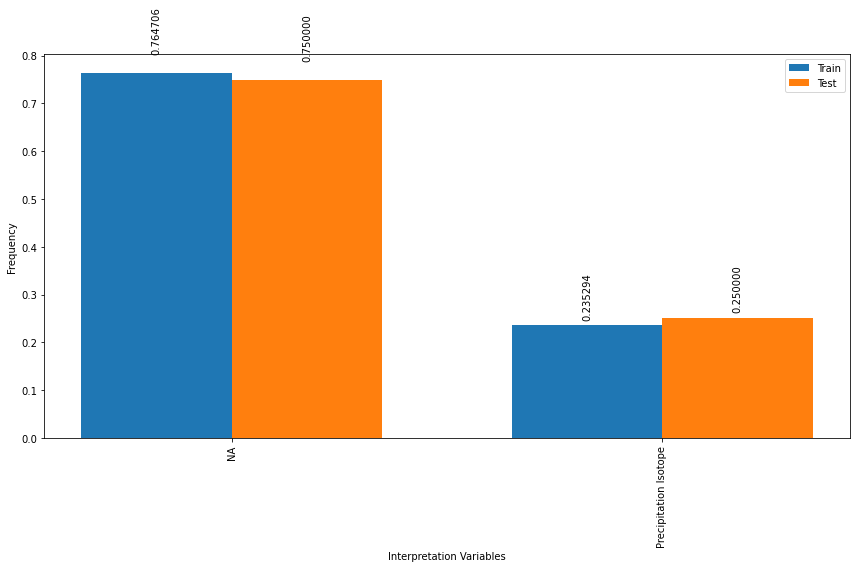

**********************************************************************************************************
PLOT FOR : DENSITY


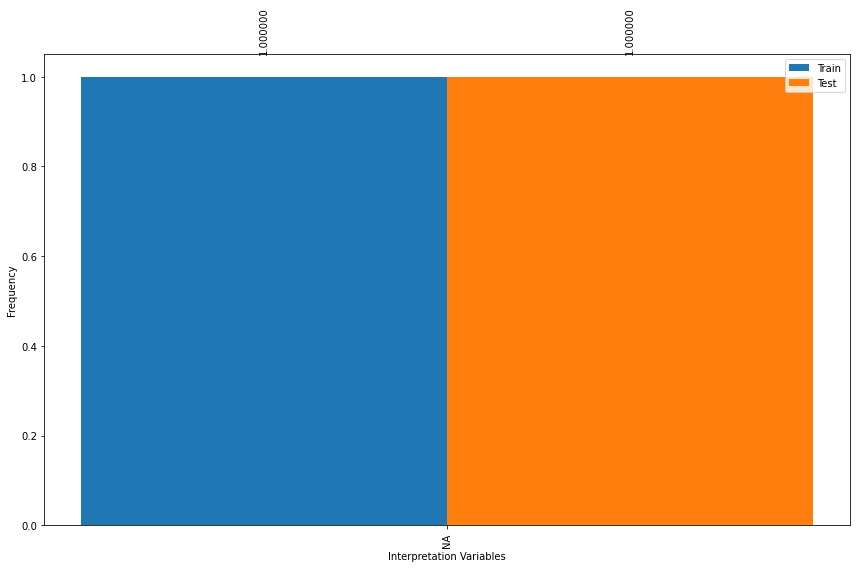

**********************************************************************************************************
PLOT FOR : TOTAL ORGANIC CARBON


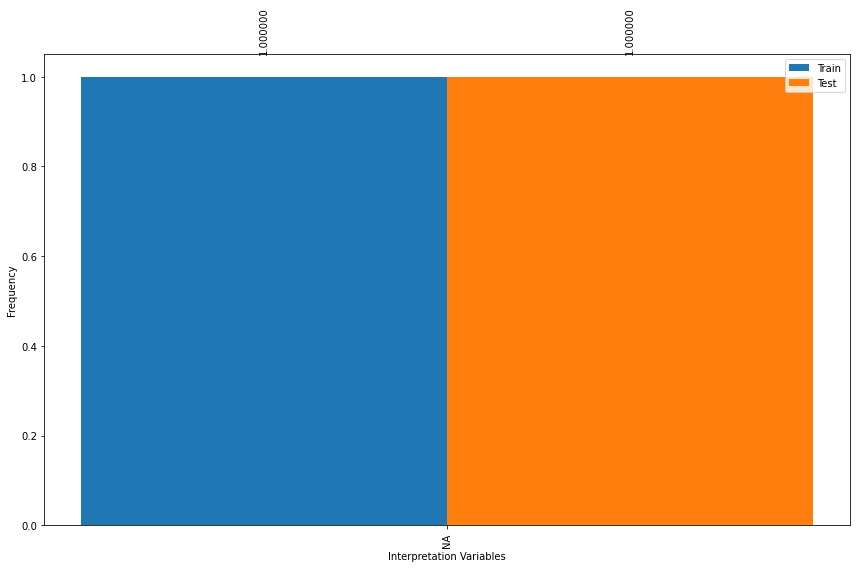

**********************************************************************************************************
PLOT FOR : EXPRESSED POPULATION SIGNAL


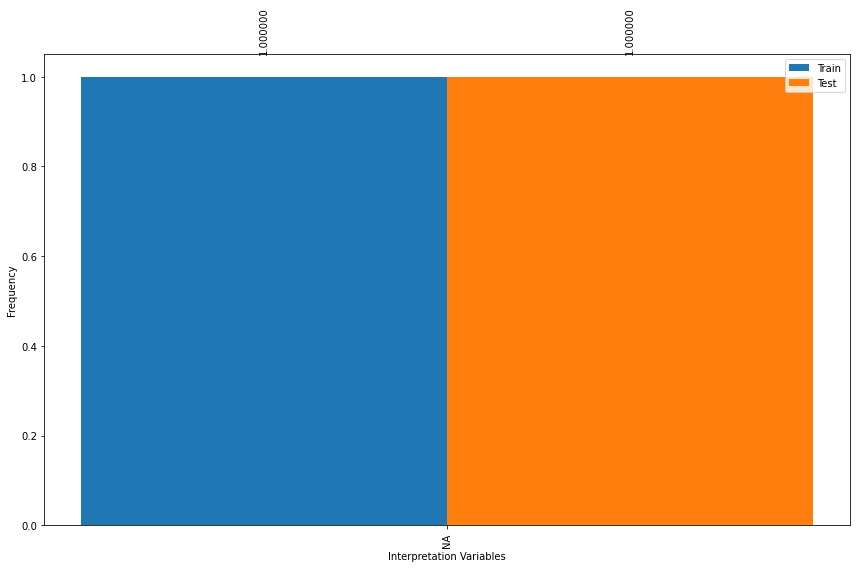

**********************************************************************************************************
PLOT FOR : SEGMENT


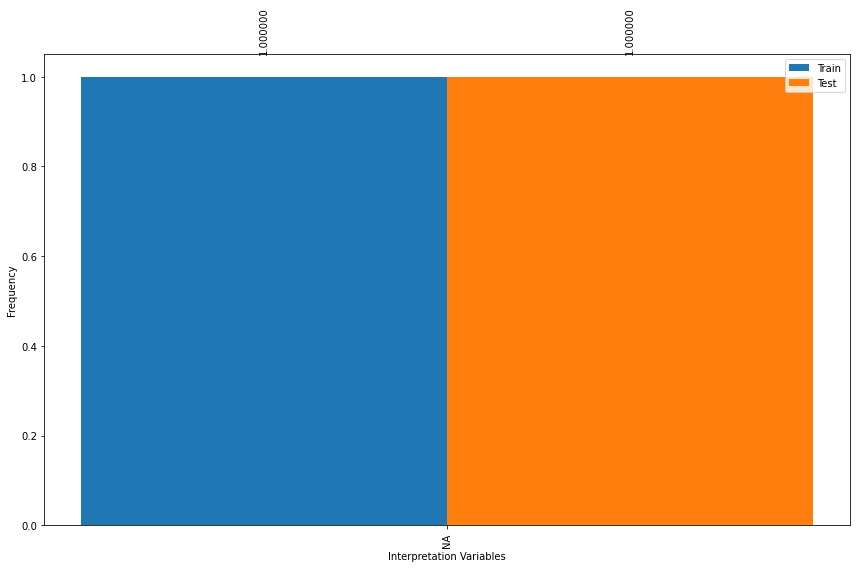

**********************************************************************************************************
PLOT FOR : CALCIFICATION


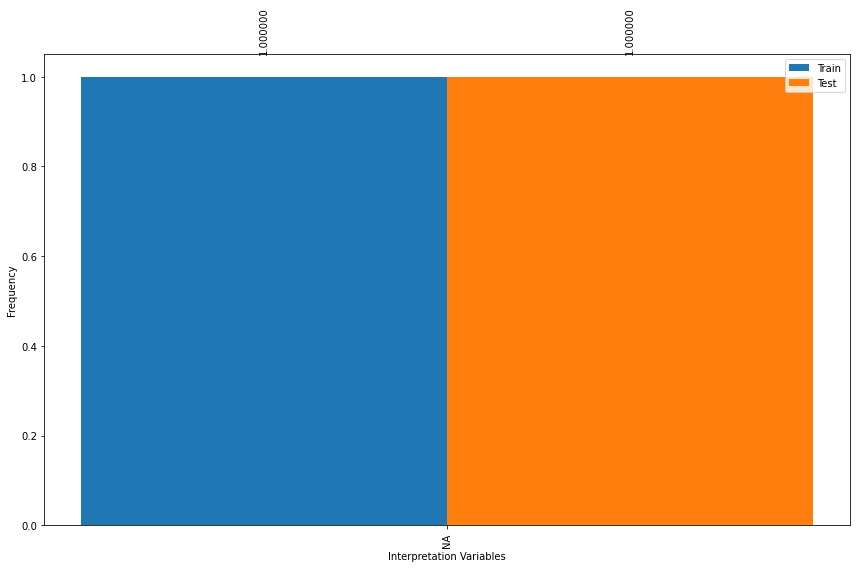

**********************************************************************************************************
PLOT FOR : FORAMINIFERA ABUNDANCE


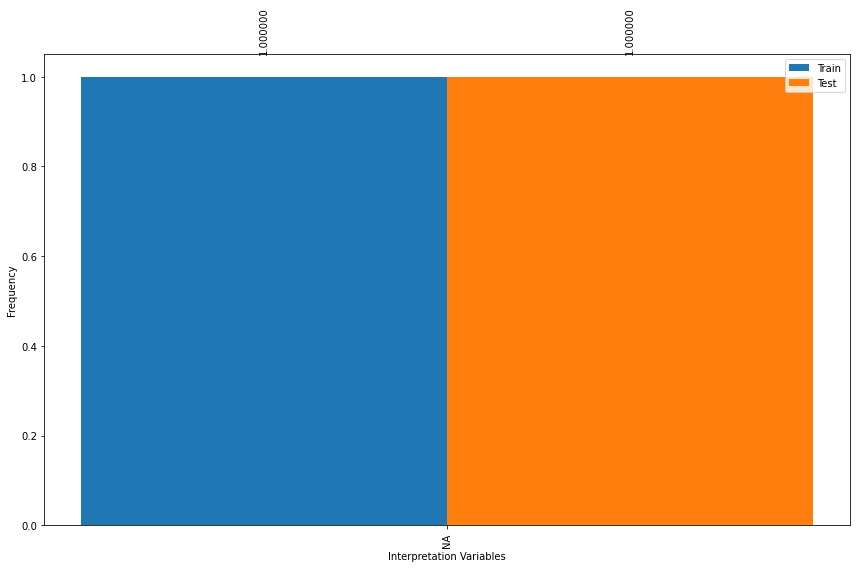

**********************************************************************************************************
PLOT FOR : 37:2ALKENONECONCENTRATION


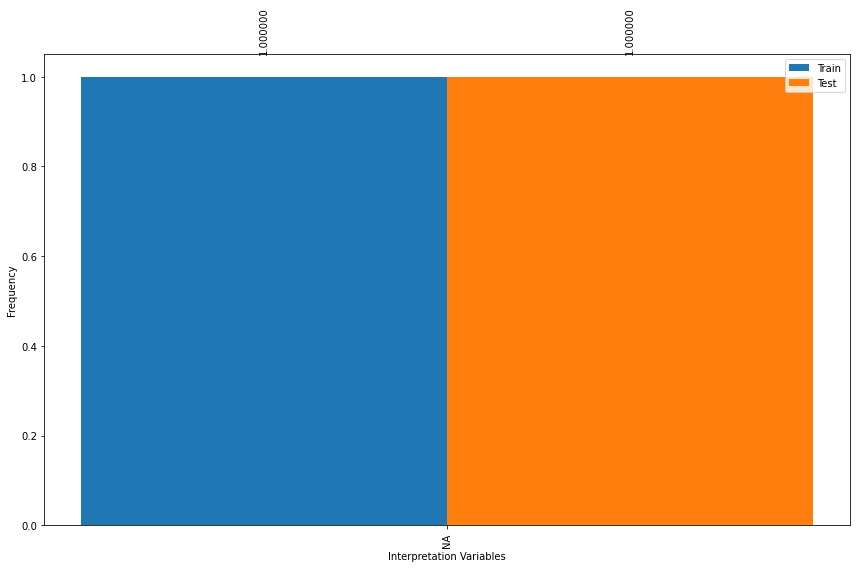

**********************************************************************************************************
PLOT FOR : PRECIPITATION


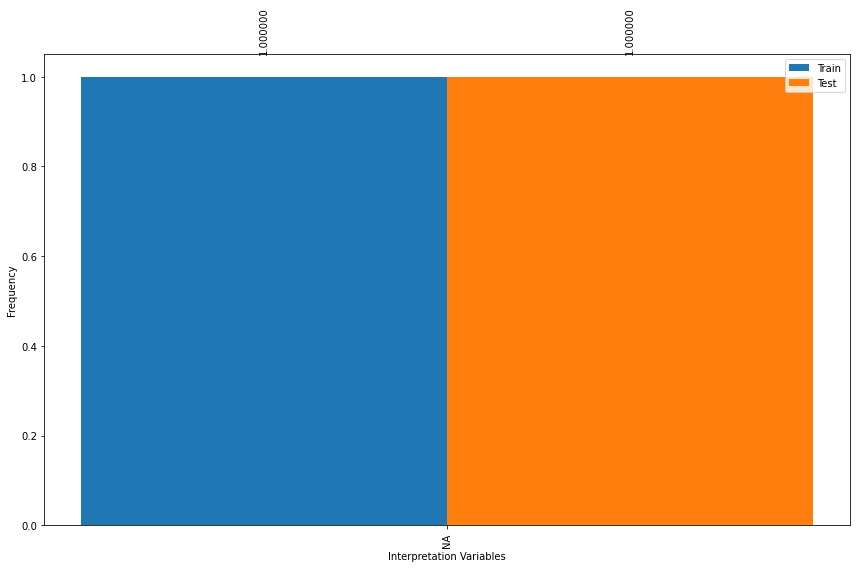

**********************************************************************************************************
PLOT FOR : ICE-RAFTED DEBRIS


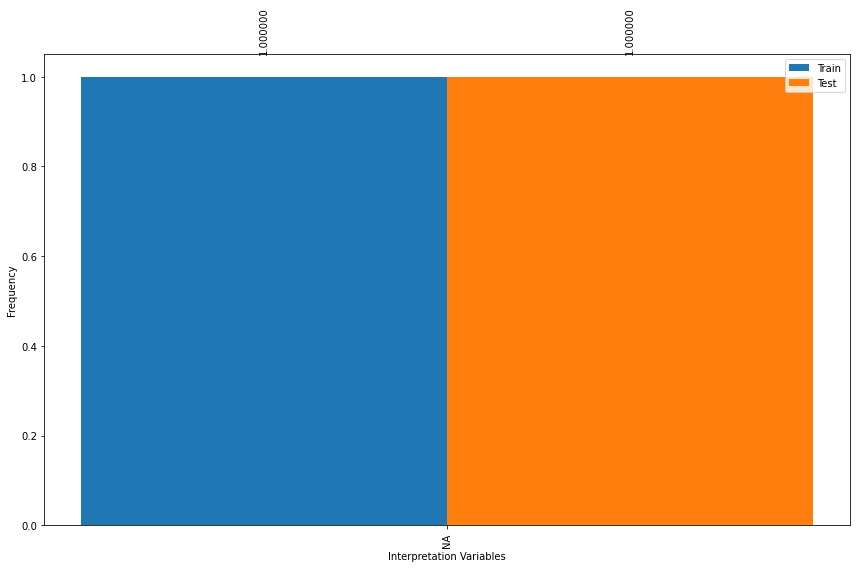

**********************************************************************************************************
PLOT FOR : MODE GRAIN SIZE


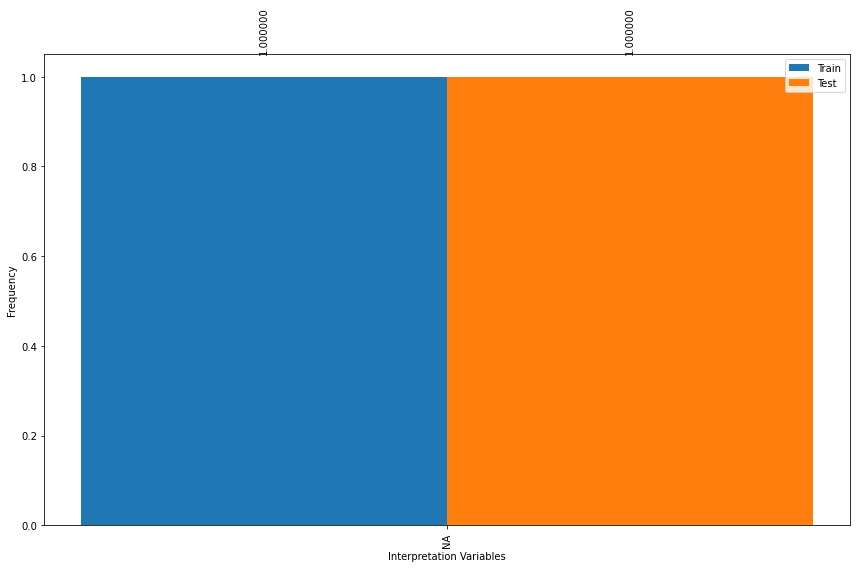

**********************************************************************************************************
PLOT FOR : MG


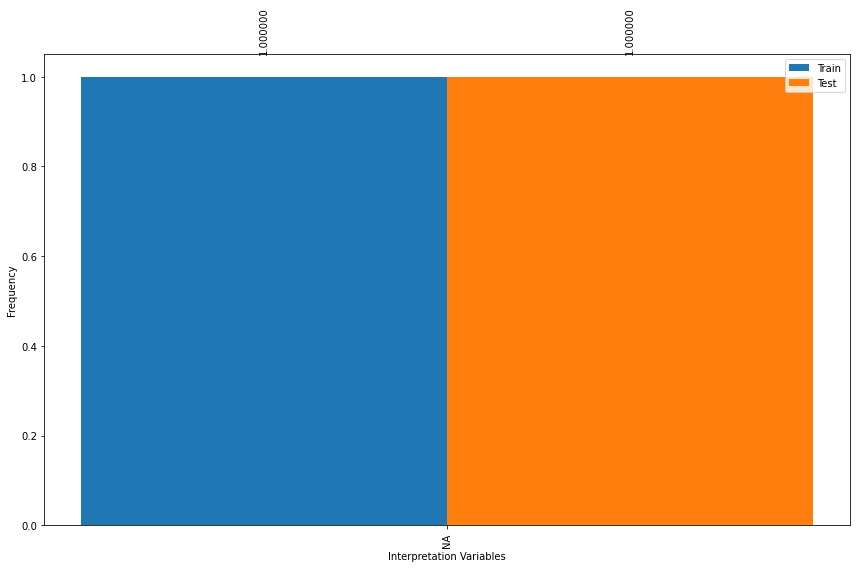

**********************************************************************************************************
PLOT FOR : NOTES


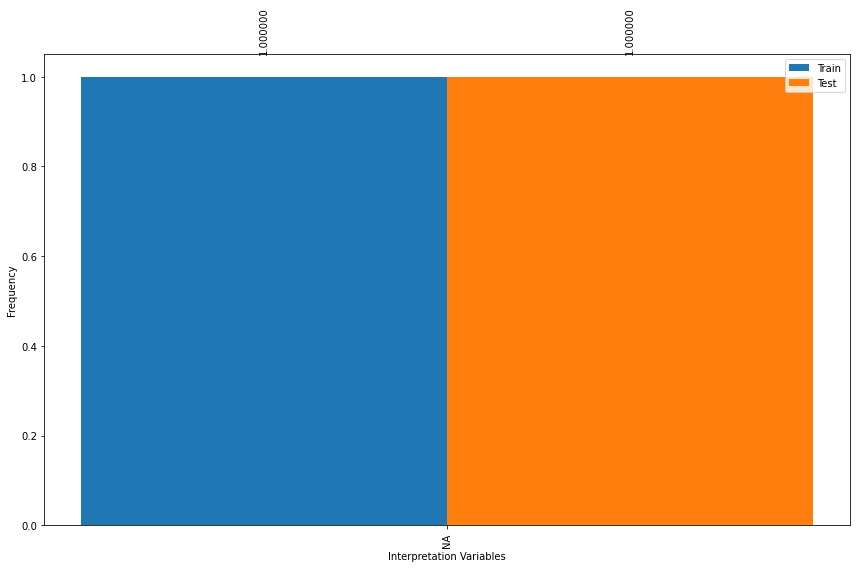

**********************************************************************************************************
PLOT FOR : NITRATE


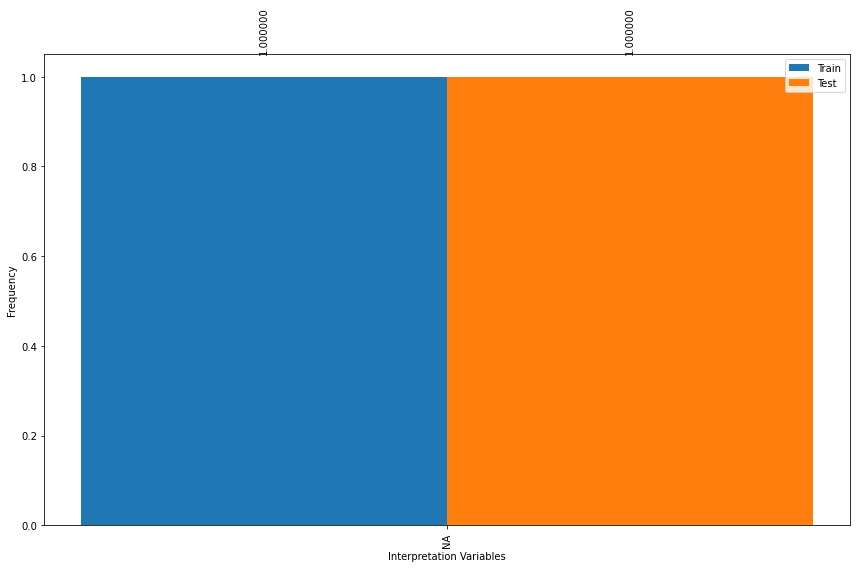

**********************************************************************************************************
PLOT FOR : DRY BULK DENSITY


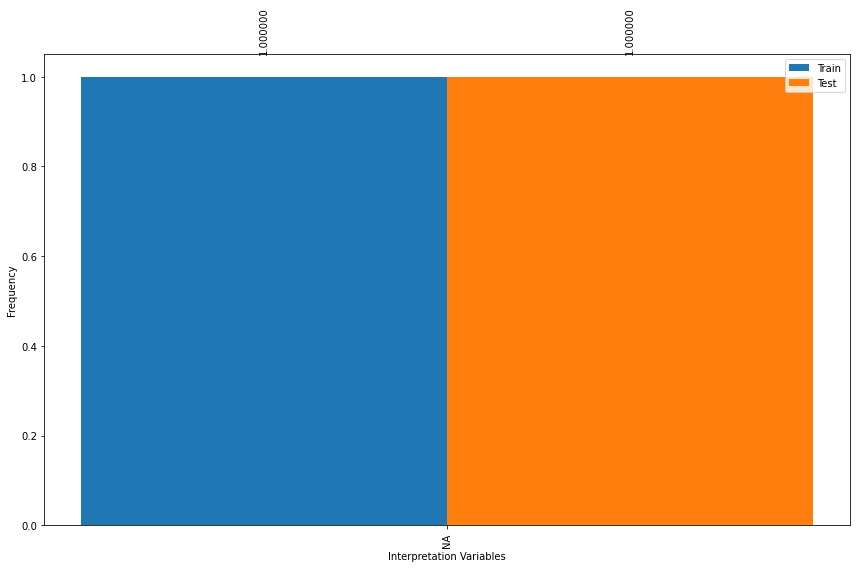

**********************************************************************************************************
PLOT FOR : MAXIMUM LATEWOOD DENSITY


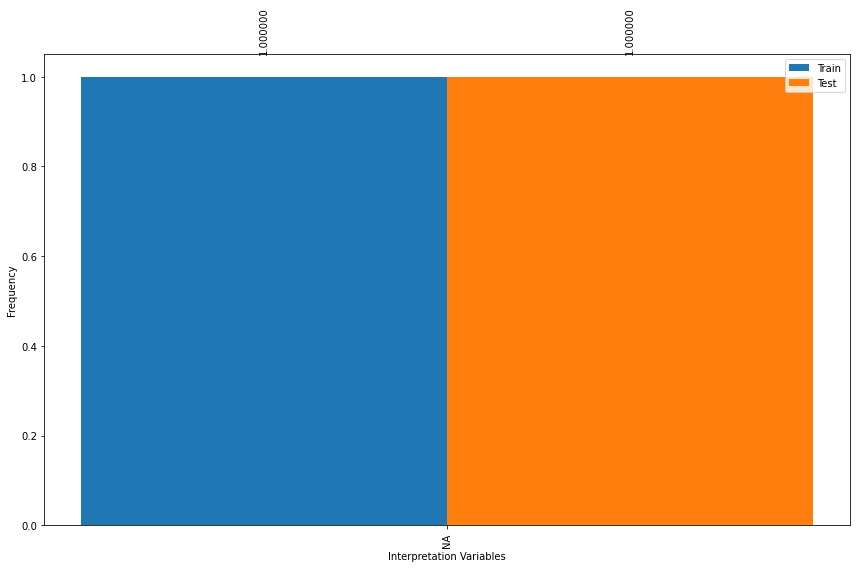

**********************************************************************************************************
PLOT FOR : LAMINATHICKENSS


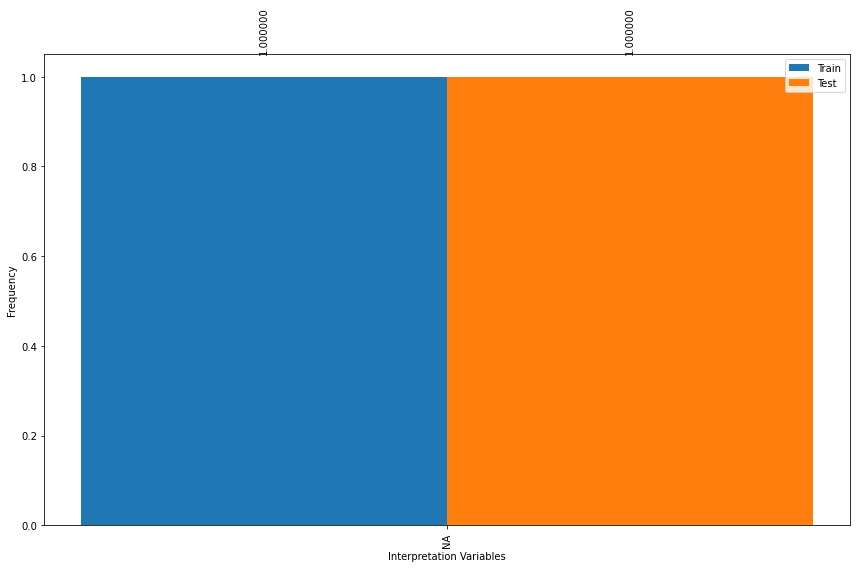

**********************************************************************************************************
PLOT FOR : UK37'


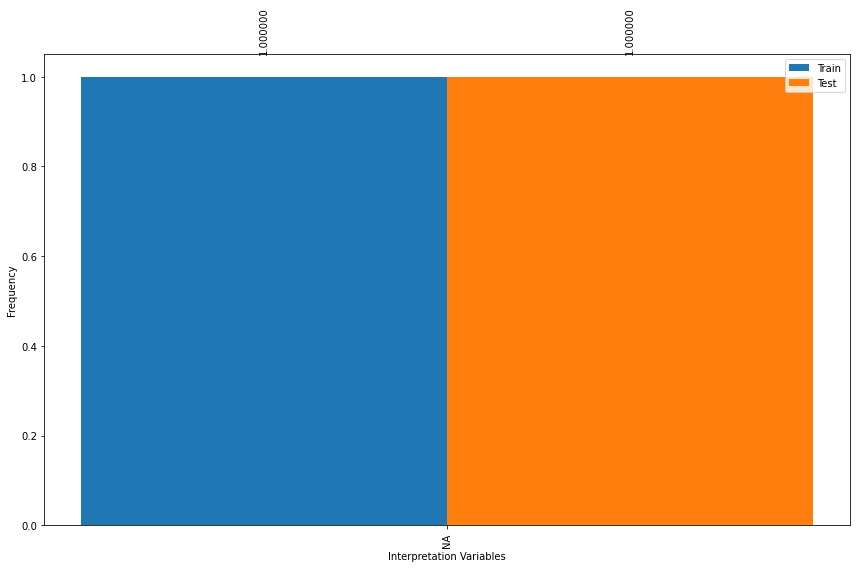

**********************************************************************************************************
PLOT FOR : JULIAN DAY


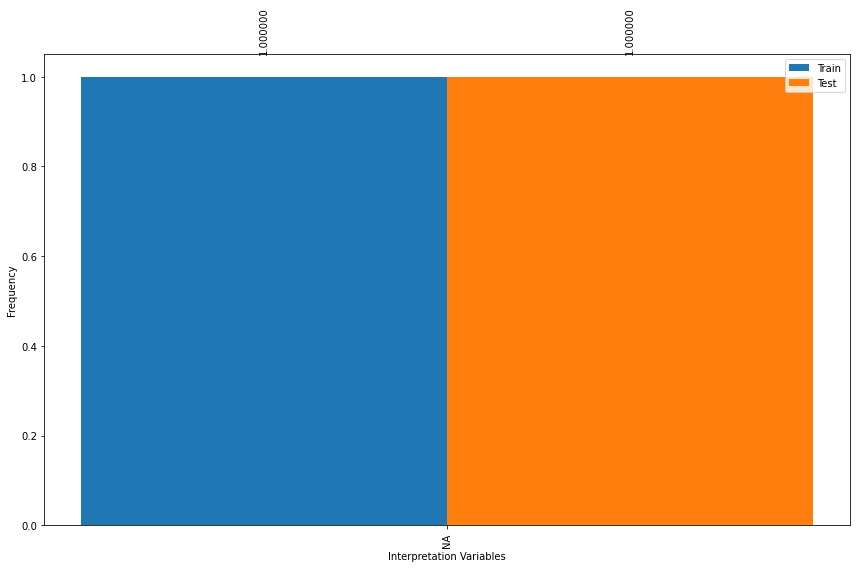

**********************************************************************************************************
PLOT FOR : MBT


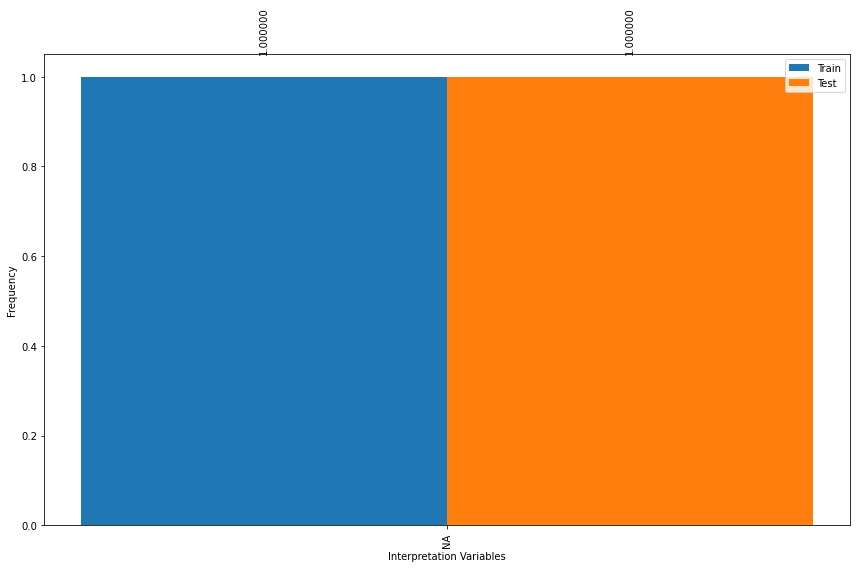

**********************************************************************************************************
**********************************************************************************************************
PLOT FOR : BRGDGT


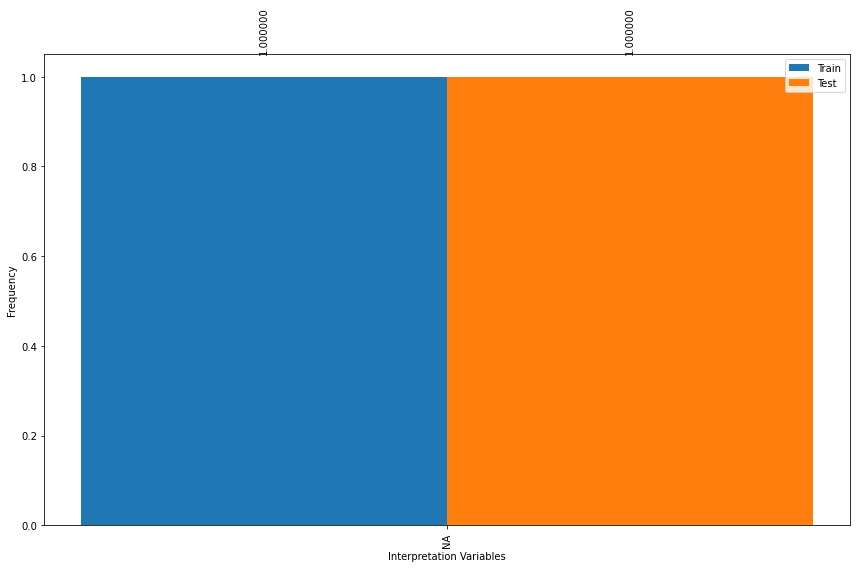

**********************************************************************************************************
PLOT FOR : CBT


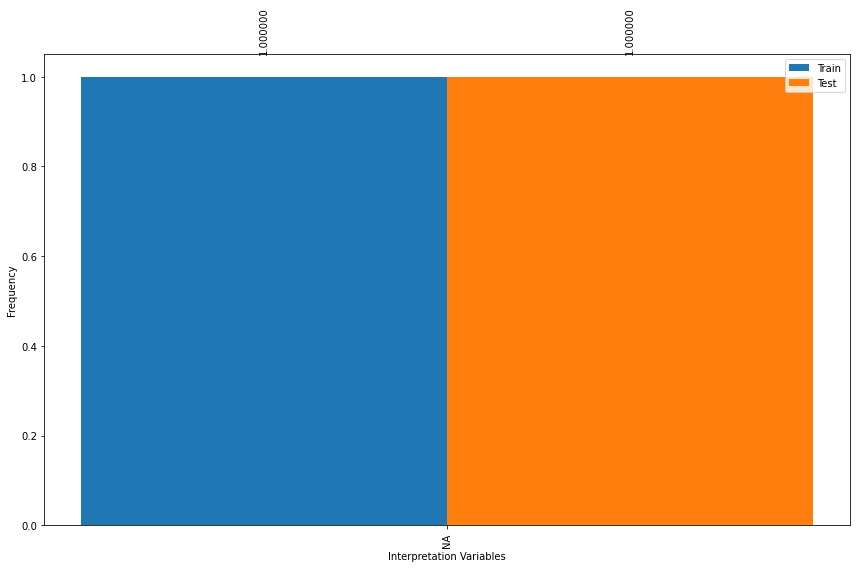

**********************************************************************************************************
PLOT FOR : SR/CA


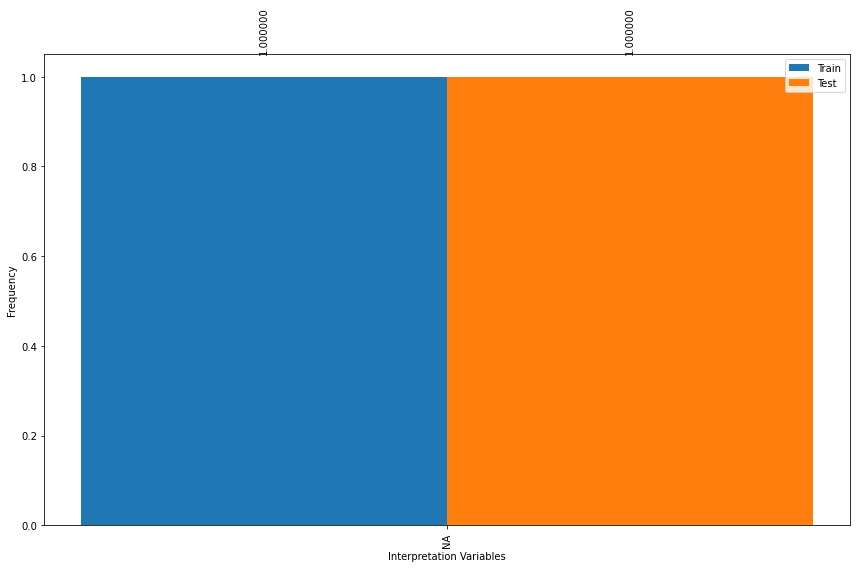

**********************************************************************************************************
PLOT FOR : TEX86


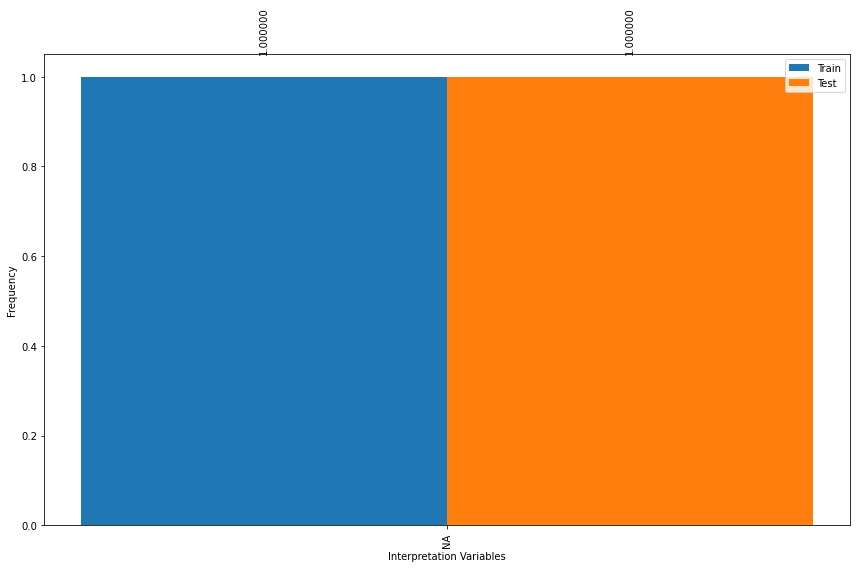

**********************************************************************************************************
PLOT FOR : BUBBLENUMBERDENSITY


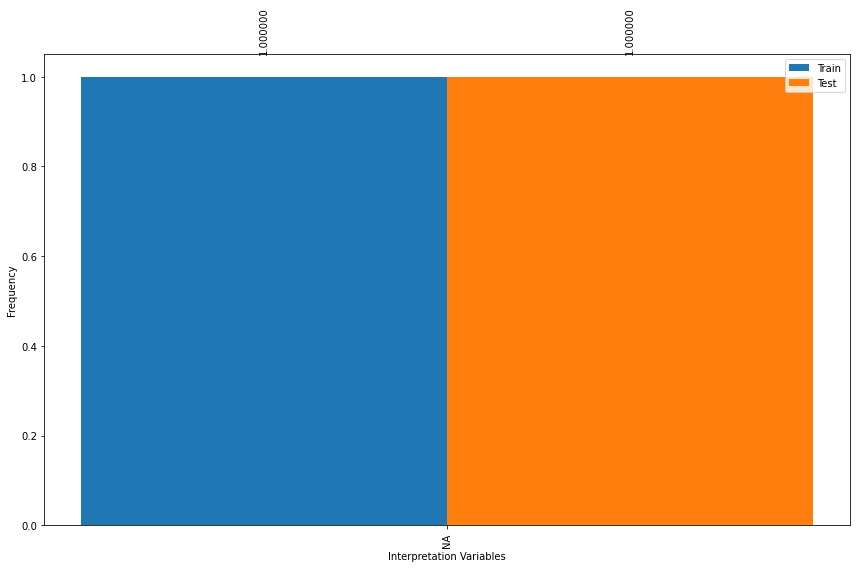

**********************************************************************************************************
PLOT FOR : C/N


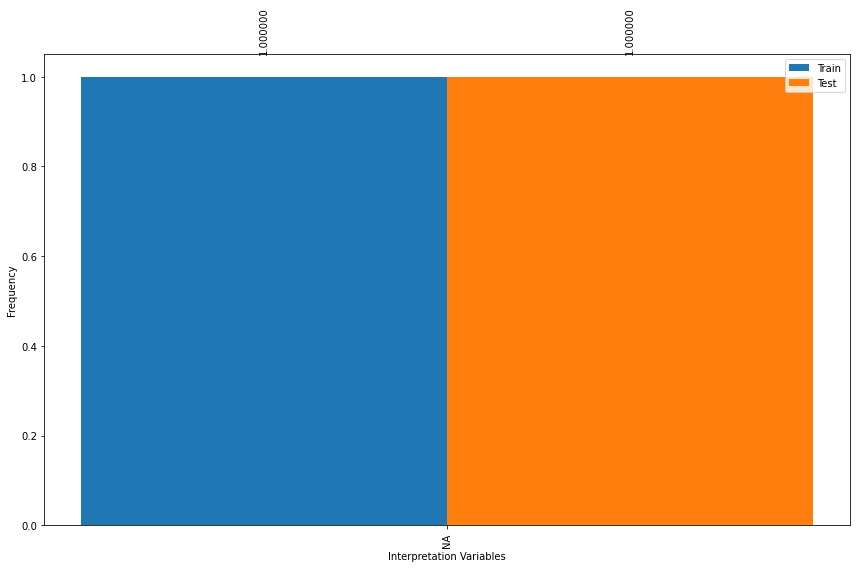

**********************************************************************************************************
PLOT FOR : LAYER THICKNESS


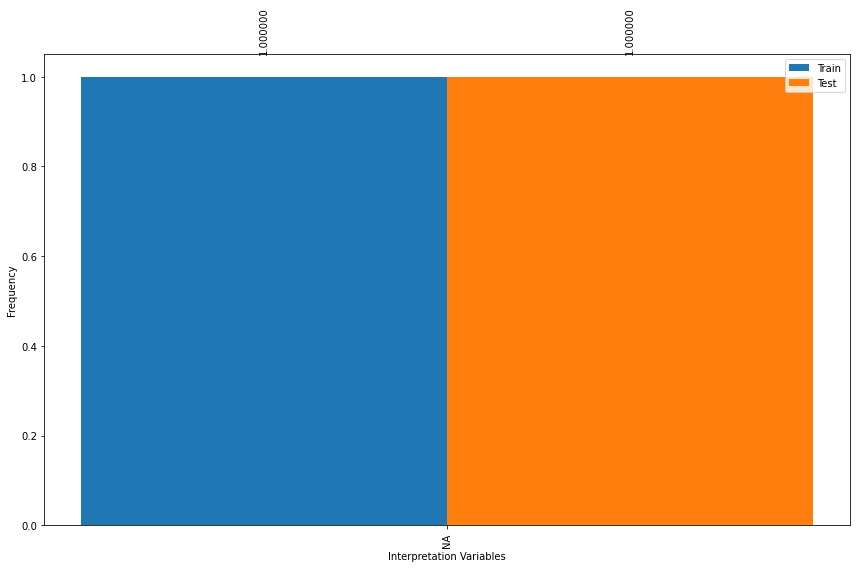

**********************************************************************************************************
PLOT FOR : EFFECTIVE MOISTURE


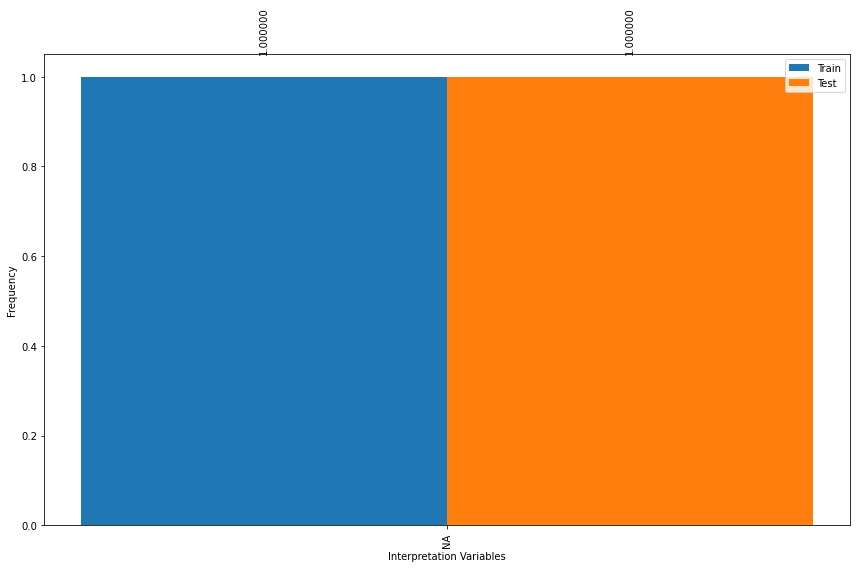

**********************************************************************************************************
PLOT FOR : NA


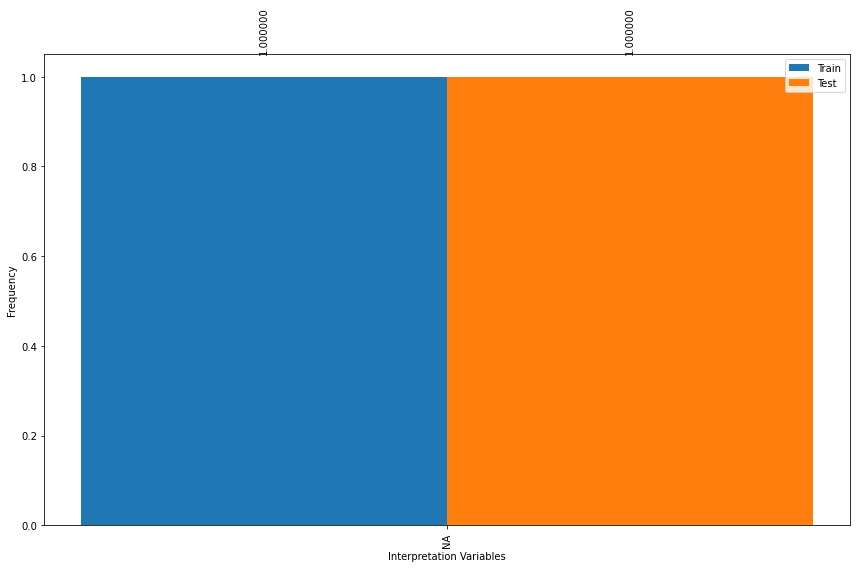

**********************************************************************************************************
PLOT FOR : CL


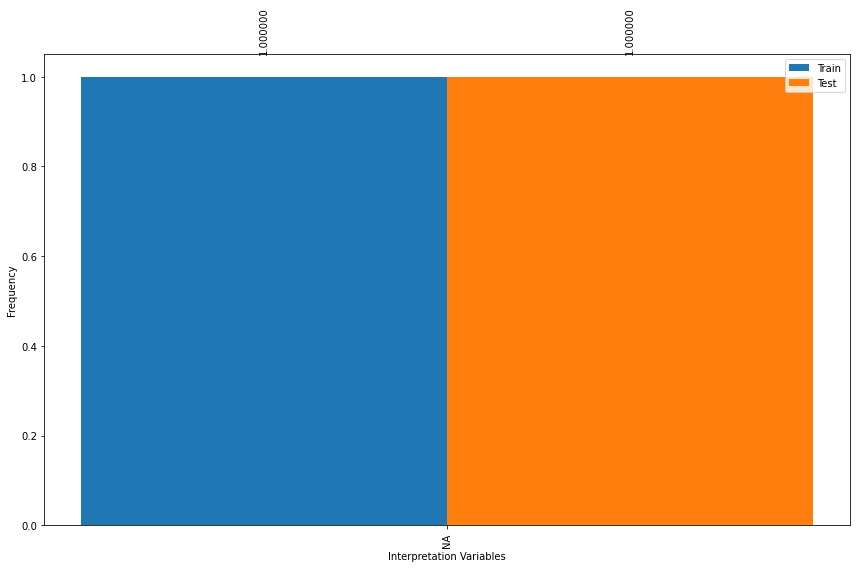

**********************************************************************************************************


In [10]:
proxy_interp_train = calc_freq(train_df, 'proxyObservationType', 'interpretation/variable')
proxy_interp_test = calc_freq(test_df, 'proxyObservationType', 'interpretation/variable')

normalize_freq(proxy_interp_train)
normalize_freq(proxy_interp_test)

draw_barplots(proxy_interp_train, proxy_interp_test, 'Interpretation Variables')